Leire Yining Santos Gil (leirey01@ucm.es)\
Jesus Sierralaya (jsierral@ucm.es)

Importamos librerias:

In [1]:
# Supress info messages
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# Import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sys
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

import pandas as pd
import time

print(tf.__version__)

2.13.0


Definimos función que dibuja el plot del historial de precisión y de error en el entrenamiento:

In [2]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure(figsize=(3,2))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['loss'],'r--',
           label='Training Error')
  plt.plot(hist['epoch'], hist['accuracy'],'b',
           label = 'accuracy')
  plt.legend()
  plt.tight_layout()
  plt.show() 

Cargamos los datos de Keras, guardamos dimensiones y preprocesamos los datos:

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Guardamos las dimensiones
ntrain = x_train.shape[0]
ntest  = x_test.shape[0]
dimf = x_train.shape[1]
dimc = x_train.shape[2]
# preproceso
x_train = x_train.astype('float32')/255.
x_train = x_train.reshape(ntrain, dimf*dimc)
x_test = x_test.astype('float32')/255.
x_test = x_test.reshape(ntest, dimf*dimc)

Creamos la matriz onehot:

In [4]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Modelo de referencia

In [5]:
model = keras.Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(dimf*dimc,)))
model.add(Dense(10, activation = 'softmax'))

Compilamos el modelo de referencia:

In [6]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd", # stochastic gradient descent
              metrics= ['accuracy'])

Entrenamiento y revisión del historial:

313/313 [==============================] - 0s 481us/step - loss: 0.8337 - accuracy: 0.8138
test accuracy:  0.8137999773025513


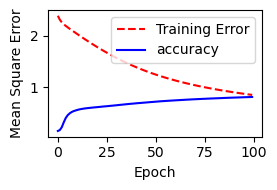

The training took 7.32980751991272 seconds


In [7]:
start_time = time.time()
history = model.fit(x_train, y_train, epochs=100,  batch_size=1000, verbose=False)
end_time = time.time()
# Calculate the duration
duration = end_time - start_time
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)
plot_history(history)
print('The training took', duration, 'seconds')

# Tareas 

## Utilizar otras neuronas con función de activación RelU

In [8]:
model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(dimf*dimc,)))
model.add(Dense(10, activation = 'softmax'))

Compilación del modelo, entrenamiento y revisión del historial de precisión.

313/313 [==============================] - 0s 517us/step - loss: 0.3218 - accuracy: 0.9068
test accuracy:  0.9067999720573425


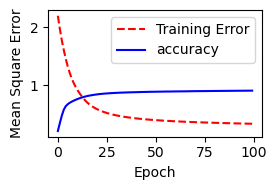

In [9]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd", # stochastic gradient descent
              metrics= ['accuracy'])
history = model.fit(x_train, y_train, epochs=100,  batch_size=1000, verbose=False)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)
plot_history(history)

Empleando la función de activación RelU aumenta la precisión, además de hacerlo en un menor número de epocas.

## Incrementar neuronas y capas

### 30 neuronas una sola capa

In [10]:
model = keras.Sequential()
model.add(Dense(30, activation='relu', input_shape=(dimf*dimc,)))
model.add(Dense(10, activation = 'softmax'))

Compilación del modelo, entrenamiento y revisión del historial de precisión.

313/313 [==============================] - 0s 492us/step - loss: 0.2792 - accuracy: 0.9224
test accuracy:  0.9223999977111816


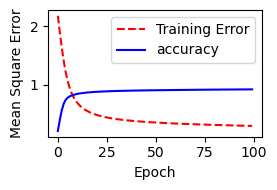

In [11]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd", # stochastic gradient descent
              metrics= ['accuracy'])
history = model.fit(x_train, y_train, epochs=100,  batch_size=1000, verbose=False)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)
plot_history(history)

Empleando 30 neuronas la precisión ha aumentado ligeramente comparado con 10 neuronas.

### 30 neuronas, 10 en cada capa

In [12]:
model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(dimf*dimc,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

Compilación del modelo, entrenamiento y revisión del historial de precisión.

313/313 [==============================] - 0s 454us/step - loss: 0.3242 - accuracy: 0.9066
test accuracy:  0.9065999984741211


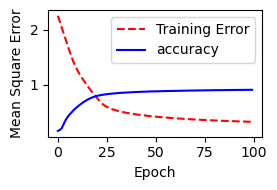

In [13]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd", # stochastic gradient descent
              metrics= ['accuracy'])
history = model.fit(x_train, y_train, epochs=100,  batch_size=1000, verbose=False)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)
plot_history(history)

La precisión es menor y toma un mayor número de epocas. Se podría concluir que más vale tener muchas neuronas en una sola capa que distribuidas en varias capas.

## Cambiando el tamaño del Batch

### Batch tamaño 100

In [14]:
model = keras.Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(dimf*dimc,)))
model.add(Dense(10, activation = 'softmax'))

In [15]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd", # stochastic gradient descent
              metrics= ['accuracy'])

313/313 [==============================] - 0s 452us/step - loss: 0.3004 - accuracy: 0.9158
test accuracy:  0.9157999753952026


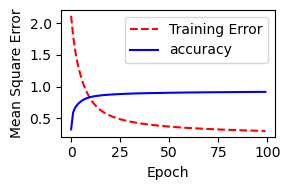

The training took 26.183234930038452 seconds


In [16]:
start_time = time.time()
history = model.fit(x_train, y_train, epochs=100,  batch_size=100, verbose=False)
end_time = time.time()
duration = end_time - start_time
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)
plot_history(history)
print('The training took', duration, 'seconds')

### Batch tamaño 1000

Ver [Modelo de referencia](#modelo-de-referencia).

### Batch tamaño 10000

In [17]:
model = keras.Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(dimf*dimc,)))
model.add(Dense(10, activation = 'softmax'))

In [18]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd", # stochastic gradient descent
              metrics= ['accuracy'])

313/313 [==============================] - 0s 476us/step - loss: 2.0297 - accuracy: 0.5070
test accuracy:  0.5070000290870667


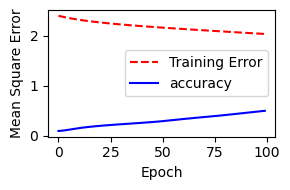

The training took 4.143632173538208 seconds


In [19]:
start_time = time.time()
history = model.fit(x_train, y_train, epochs=100,  batch_size=10000, verbose=False)
end_time = time.time()
duration = end_time - start_time
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)
plot_history(history)
print('The training took', duration, 'seconds')

A mayor es el tamaño del Batch menor es el tiempo que se toma el entrenamiento pero como se observa va perdiendo precisión hasta el punto en el que no es capaz de subir del 0.5.\
En la tabla se puede ver un aproximado de los segundos que toma el entrenamiento si se elige un número determinado de Batchs:

## Prueba a utilizar otros optimizadores como adam o RMSprop

### Optimizador Adam

In [20]:
model = keras.Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(dimf*dimc,)))
model.add(Dense(10, activation = 'softmax'))

In [21]:
model.compile(loss="categorical_crossentropy",
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= ['accuracy'])

313/313 [==============================] - 0s 414us/step - loss: 0.2524 - accuracy: 0.9276
test accuracy:  0.9276000261306763


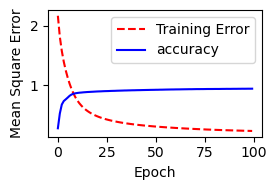

In [22]:
history = model.fit(x_train, y_train, epochs=100,  batch_size=1000, verbose=False)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)
plot_history(history)

### Optimizador RMSprop

In [23]:
model = keras.Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(dimf*dimc,)))
model.add(Dense(10, activation = 'softmax'))

In [24]:
model.compile(loss="categorical_crossentropy",
              optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics= ['accuracy'])

313/313 [==============================] - 0s 442us/step - loss: 0.2367 - accuracy: 0.9294
test accuracy:  0.9294000267982483


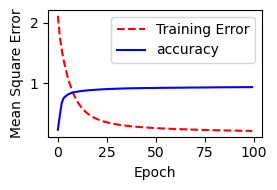

In [25]:
history = model.fit(x_train, y_train, epochs=100,  batch_size=1000, verbose=False)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)
plot_history(history)

Ambos, Adam y RMSprop, alcanzan una mayor precisión y en un menor número de épocas a diferencia del optimizador estocástico de gradiente descendente "sgd".